
Imports



In [630]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
import math

Load the Image




(1000, 1000, 3)


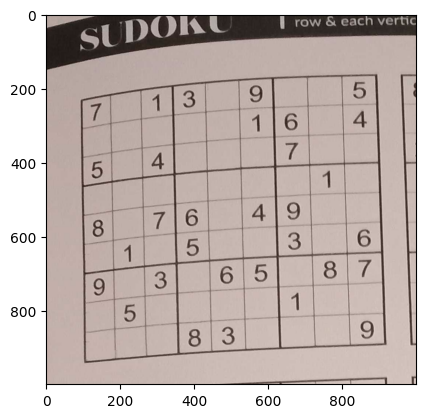

In [631]:
#Done: 1,2,4,6,7,9,11,14
#Failed:  8, 15, 16
#inverted: 3,5,10,12,13

imgGroup = [cv2.imread('Project Test Cases-20231212/01.jpg'),
       cv2.imread('Project Test Cases-20231212/02.jpg'),
       cv2.imread("Project Test Cases-20231212/03.jpg"),
       cv2.imread("Project Test Cases-20231212/04.jpg"),
       cv2.imread("Project Test Cases-20231212/05.jpg"),
       cv2.imread("Project Test Cases-20231212/06.jpg"),
       cv2.imread("Project Test Cases-20231212/07.jpg"),
       cv2.imread("Project Test Cases-20231212/08.jpg"),
       cv2.imread("Project Test Cases-20231212/09.jpg"),
       cv2.imread("Project Test Cases-20231212/10.jpg"),
       cv2.imread("Project Test Cases-20231212/11.jpg"),
       cv2.imread("Project Test Cases-20231212/12.jpg"),
       cv2.imread("Project Test Cases-20231212/13.jpg"),
       cv2.imread("Project Test Cases-20231212/14.jpg"),
       cv2.imread("Project Test Cases-20231212/15.jpg"),
       cv2.imread("Project Test Cases-20231212/16.jpg")]



# imgGroup = [cv2.imread('/content/01-Normal.jpg'),
#        cv2.imread('/content/02-TheMightyFinger.jpg'),
#        cv2.imread("/content/03-WhereBorder.jpg"),
#        cv2.imread("/content/04-CompressoEspresso.jpg"),
#        cv2.imread("/content/05-Ya3amSheel2elCoinYa3am.jpg"),
#        cv2.imread("/content/06-FarAndCurved.jpg"),
#        cv2.imread("/content/07-2elNoor2ata3.jpg"),
#        cv2.imread("/content/08-MeshShayef7agaYa3am.jpg"),
#        cv2.imread("/content/09-Normal2.jpg"),
#        cv2.imread("/content/10-Mal7wFelfel.jpg"),
#        cv2.imread("/content/11-FlashBang.jpg"),
#        cv2.imread("/content/12-BrokenPrinter.jpg"),
#        cv2.imread("/content/13-DarkMode.jpg"),
#        cv2.imread("/content/14-Sine.jpg"),
#        cv2.imread("/content/15-GoneWithTheWind.jpg"),
#        cv2.imread("/content/16-SomethingWentTerriblyWrongHere.jpg")]

number = 6
img = imgGroup[number-1].copy()

print(img.shape)
plt.imshow(img, cmap="gray")


Convert to Grayscale

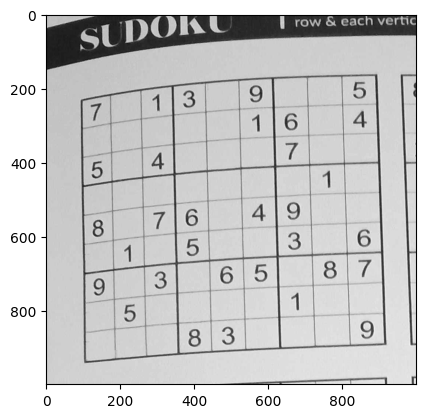

In [632]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image  , cmap="gray")

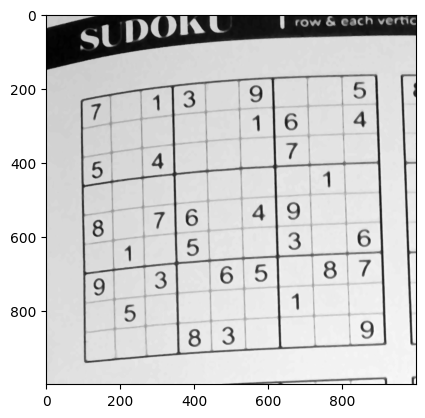

In [633]:
mean1 = cv2.medianBlur(gray_image.astype(np.uint8),5)
mean2 = cv2.medianBlur(mean1,5)
mean3 = cv2.medianBlur(mean2,5)
mean5 = cv2.medianBlur(mean3,3)
mean5 = (mean5 - mean5.min()) * (255/(mean5.max() - mean5.min()))
plt.imshow(mean5, cmap="gray")

In [634]:
dft_img = np.fft.fft2(mean3)
dft_img_shift = np.fft.fftshift(dft_img)
# plt.imshow(np.log(np.abs(dft_img_shift)), cmap = 'gray');

In [635]:
mask = np.zeros(dft_img.shape)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), 120, (255,255,255), -1).astype(np.uint8)
mask = cv2.GaussianBlur(mask, (21,21), 0)
dft_img_shifted = np.fft.fftshift(dft_img)
dft_img_shifted_lowpass = np.multiply(dft_img_shifted, mask)
img = np.fft.ifft2(np.fft.ifftshift(dft_img_shifted_lowpass))
# fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
# ax1.set(yticks=[0, img.shape[0]//2, img.shape[0] - 1], yticklabels=[-img.shape[0]//2, 0, img.shape[0]//2 - 1]);
# ax1.set(xticks=[0, img.shape[1]//2, img.shape[1] - 1], xticklabels=[-img.shape[1]//2, 0, img.shape[1]//2 - 1]);
# ax1.imshow(np.abs(dft_img_shifted)**0.1, cmap = 'gray');
# ax2.imshow(np.abs(img), cmap = 'gray')

In [636]:
img1 = np.fft.ifft2(np.fft.ifftshift(dft_img))
img1 = np.abs(img1)

# plt.imshow(img1, cmap="gray")

Adaptive Thresholding

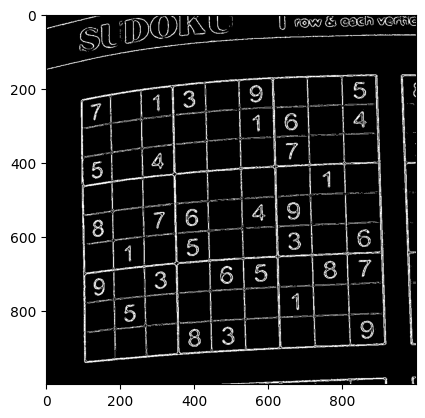

In [637]:

img_gray_threshed = cv2.adaptiveThreshold(src=img1.astype(np.uint8),
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=5,
    C=3
)

plt.imshow(img_gray_threshed, cmap="gray")

In [638]:
mean4 = cv2.medianBlur(img_gray_threshed,3)
closed_grid = np.zeros_like(mean4, dtype = np.uint8)
closed_grid = cv2.morphologyEx(img_gray_threshed, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9)))
# plt.imshow(closed_grid, cmap="gray")

In [639]:
maxArea = -1
x = -1
contours, _ = cv2.findContours(closed_grid, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
selected_contours = []
sudoku_square = np.zeros(img_gray_threshed.shape, np.uint8)
for i in range(len(contours)):
  area = cv2.contourArea(contours[i])
  if area > maxArea:
     maxArea = area
     x = i


peri = cv2.arcLength(contours[x],True)
corners = cv2.approxPolyDP(contours[x],0.06*peri,True)



selected_contours.append(contours[x])
cv2.fillPoly(sudoku_square, pts=selected_contours, color= (255,255,255))
# print(corners)

#######
min1 = 999999
min1Index = -1
for i in range(4):
  if corners[i][0][1] < min1:
    min1 = corners[i][0][1]
    min1Index = i

min2 = 999999
min2Index = -1
for i in range(4):
  if i == min1Index:
    continue
  if corners[i][0][1] < min2:
    min2 = corners[i][0][1]
    min2Index = i

c1 = 0
c2 = 0

if corners[min1Index][0][0] < corners[min2Index][0][0]:
  c1 =  corners[min1Index][0]
  c2 = corners[min2Index][0]
else:
  c2 =  corners[min1Index][0]
  c1 = corners[min2Index][0]

i1 = -1
i2 = -1
for i in range(4):
  if i != min1Index and i!= min2Index:
    i1 = i


for i in range(4):
  if i != min1Index and i!= min2Index and i != i1:
    i2 = i

c3 = 0
c4 = 0

if corners[i1][0][1] < corners[i2][0][1]:
  c4 =  corners[i1][0]
  c3 = corners[i2][0]
else:
  c3 =  corners[i1][0]
  c4 = corners[i2][0]


print(c1)
print(c2)
print(c3)
print(c4)

######

# plt.imshow(sudoku_square, cmap="gray")

[ 98 230]
[895 165]
[104 941]
[918 893]


Extract Edges using Canny

In [640]:
dx = cv2.Sobel(sudoku_square,cv2.CV_16S,1,0,None,5,1,5)
dy = cv2.Sobel(sudoku_square,cv2.CV_16S,0,1,None,5,1,5)
canny_img = cv2.Canny(dx,dy,230,255,None,True)

# plt.imshow(canny_img, cmap="gray")

In [641]:

hough_lines = cv2.HoughLines(
    image=canny_img,
    rho=1,  # Distance resolution of the accumulator in pixels.
    theta=0.00120,  # Angle resolution of the accumulator in radians.
    threshold=250,  # Voting threshold for accumulator.
    lines=None,
    min_theta=0,  # Minimum angle to check for lines in radians.
    max_theta=math.pi  # Maximum angle to check for lines in radians.
)


tmp_imgy = np.zeros_like(img_gray_threshed, dtype = np.uint8)
for rho, theta in hough_lines[:,0]:
    # Mapping from polar (rho, theta) to cartesian (x0, y0)
    x0 = math.cos(theta) * rho
    y0 = math.sin(theta) * rho
    # Create an extension to the points
    pt1 = (int(x0 + 2000*(-math.sin(theta))), int(y0 + 2000*(math.cos(theta))))
    pt2 = (int(x0 - 2000*(-math.sin(theta))), int(y0 - 2000*(math.cos(theta))))
    cv2.line(tmp_imgy, pt1, pt2, (255,0,0), 1, cv2.LINE_AA)


# tmp_imgy = cv2.erode(tmp_imgy,cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
# plt.imshow(tmp_imgy, cmap='gray')




Perspective Transform

In [642]:
input_points = np.float32([corners[1][::-1],corners[0][::-1], corners[2][::-1], corners[3][::-1]])
width = img.shape[1]
height = img.shape[0]

converted_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
matrix = cv2.getPerspectiveTransform(input_points, converted_points)
img_output = cv2.warpPerspective(img_gray_threshed, matrix, (width, height))
# plt.imshow(img_output, cmap="gray")


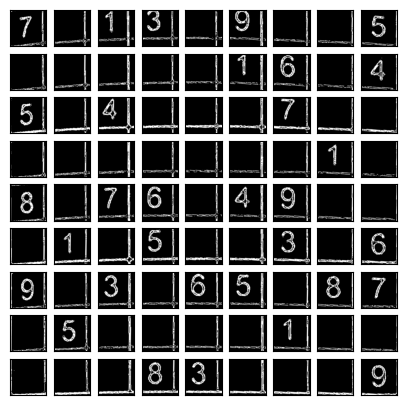

In [643]:
M = img_output.shape[0] // 9
N = img_output.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_output[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

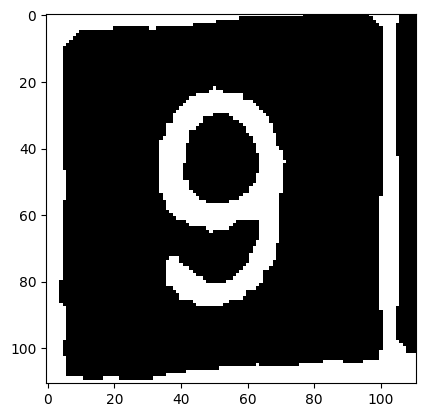

In [684]:
myimg = number_tiles[-3][0]
mean4 = cv2.medianBlur(myimg,3)
myimg = cv2.morphologyEx(myimg, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))
myimg = cv2.threshold(myimg, 100, 255, cv2.THRESH_BINARY)
# print(myimg)
myimg = myimg[1].astype(np.uint8)
# plt.imshow(closed_grid, cmap="gray")
plt.imshow(myimg, cmap='gray')

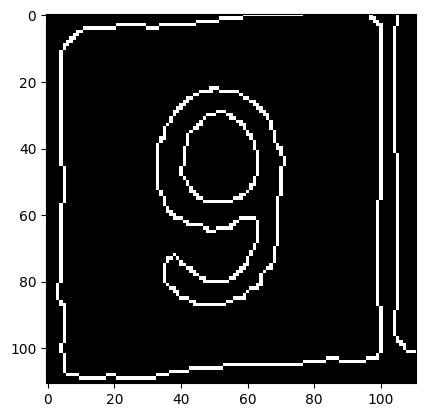

In [685]:
myimg = cv2.Canny(myimg, 30, 150)
# myimg = cv2.morphologyEx(myimg, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)))
# myimg = cv2.threshold(myimg, 100, 255, cv2.THRESH_BINARY)
# myimg = myimg[1].astype(np.uint8)
plt.imshow(myimg, cmap='gray')

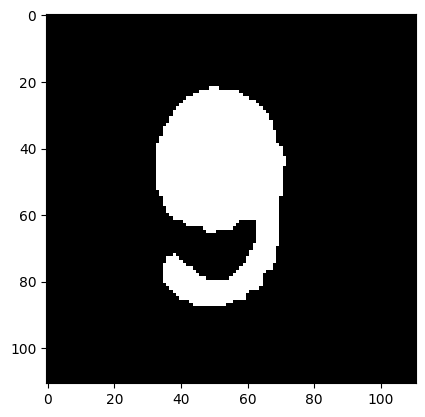

In [686]:
max = -1
x = -1

contours, _ = cv2.findContours(myimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
selected_contours = []
num = np.zeros(myimg.shape, np.uint8)
for i in range(len(contours)):
  area = cv2.contourArea(contours[i])
  if area > max:
     max = area
     x = i

selected_contours.append(contours[x])
cv2.fillPoly(num, pts=selected_contours, color= (255,255,255))
plt.imshow(num, cmap="gray")

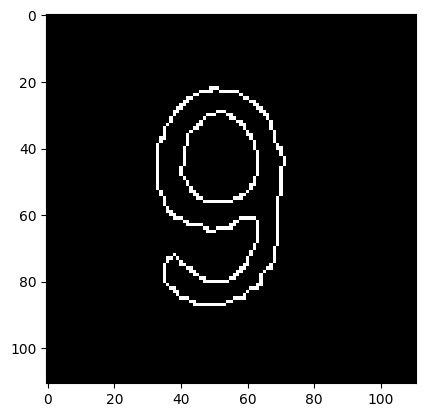

In [687]:
num = num & myimg

cv2.imwrite('/home/youssef/Projects/Sudoku-Image-Processing/NumberData/Number9/num6.jpg', num)
plt.imshow(num, cmap='gray')

(111, 111)
X: 111, Y: 111
(0, 55)
(0, 27)
(0, 82)
Verical
(55, 0)
(27, 0)
(82, 0)


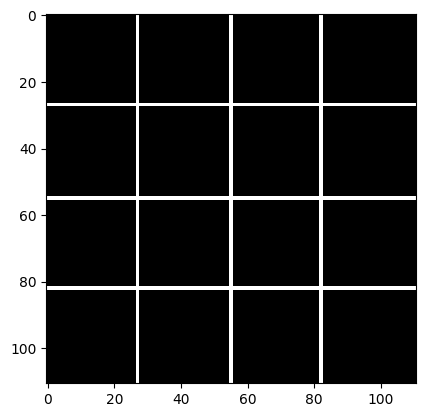

In [648]:
img_dimensions = num.shape
print(img_dimensions)

image = np.zeros_like(number_tiles[0][0], dtype = np.uint8)
halfy = img_dimensions[1] // 2

l1Start = (0, halfy)
l1End = (img_dimensions[0], halfy)

quartery = halfy // 2
l2Start = (0, quartery)
l2End = (img_dimensions[0], quartery)

l3Start = (0, halfy + quartery)
l3End = (img_dimensions[0], halfy + quartery)
print(f"X: {img_dimensions[0]}, Y: {img_dimensions[1]}")
print(l1Start)
print(l2Start)
print(l3Start)


image = cv2.line(image, l1Start, l1End, (255, 255, 255), 1)
image = cv2.line(image, l2Start, l2End, (255, 255, 255), 1)
image = cv2.line(image, l3Start, l3End, (255, 255, 255), 1)

## To draw vertical lines
halfx = img_dimensions[0] // 2
l1vStart = (halfx, 0)
l1vEnd = (halfx, img_dimensions[1])

quarterx = halfx // 2
l2vStart = (quarterx, 0)
l2vEnd = (quarterx, img_dimensions[1])

l3vStart = (halfx + quarterx, 0)
l3vEnd = (halfx + quarterx, img_dimensions[1])

print("Verical")

print(l1vStart)
print(l2vStart)
print(l3vStart)

image = cv2.line(image, l1vStart, l1vEnd, (255, 255, 255), 1)
image = cv2.line(image, l2vStart, l2vEnd, (255, 255, 255), 1)
image = cv2.line(image, l3vStart, l3vEnd, (255, 255, 255), 1)

plt.imshow(image, cmap = "gray")


3


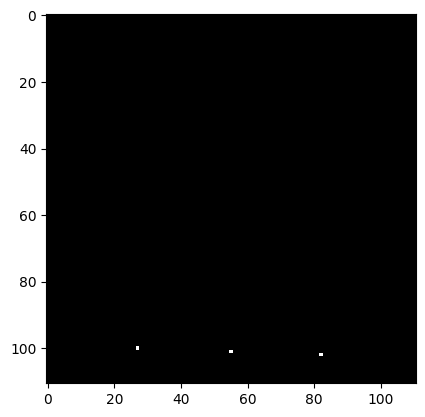

In [649]:
out = image & num
count = 0

for i in range(out.shape[0]):
    for j in range(out.shape[1]):
        if out[i][j] > 0:
            count += 1

print(count)
plt.imshow(out, cmap='gray') 